# **Phishing Website Detection by Machine Learning Techniques**

## **1. Objective:**
A phishing website is a common social engineering method that mimics trustful uniform resource locators (URLs) and webpages. The objective of this project is to train machine learning models and deep neural nets on the dataset created to predict phishing websites. Both phishing and benign URLs of websites are gathered to form a dataset and from them required URL and website content-based features are extracted. The performance level of each model is measures and compared.

## **2. Loading Data:**

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, classification_report, confusion_matrix
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, VotingClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from lightgbm import LGBMClassifier
import seaborn as sns

In [8]:
#Loading the data
data0 = pd.read_csv('./DataFiles/dataset_phishing.csv')
data0.head()

,url,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,...,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
0,http://www.crestonwood.com/router.php,37,19,0,3,0,0,0,0,0,...,0,1,0,45,-1,0,1,1,4,legitimate
1,http://shadetreetechnology.com/V4/validation/a...,77,23,1,1,0,0,0,0,0,...,1,0,0,77,5767,0,0,1,2,phishing
2,https://support-appleld.com.secureupdate.duila...,126,50,1,4,1,0,1,2,0,...,1,0,0,14,4004,5828815,0,1,0,phishing
3,http://rgipt.ac.in,18,11,0,2,0,0,0,0,0,...,1,0,0,62,-1,107721,0,0,3,legitimate
4,http://www.iracing.com/tracks/gateway-motorspo...,55,15,0,2,2,0,0,0,0,...,0,1,0,224,8175,8725,0,0,6,legitimate


## **3. Familiarizing with Data**
In this step, few dataframe methods are used to look into the data and its features.

In [9]:
#Checking the shape of the dataset
data0.shape

(11430, 89)

In [10]:
features = [
    'length_url', 'length_hostname', 'ip', 'nb_dots', 'nb_hyphens', 'nb_at', 'nb_qm', 'nb_and', 'nb_or', 'nb_eq',
    'nb_underscore', 'nb_tilde', 'nb_percent', 'nb_slash', 'nb_star', 'nb_colon', 'nb_comma', 'nb_semicolumn',
    'nb_dollar', 'nb_space', 'nb_www', 'nb_com', 'nb_dslash', 'http_in_path', 'https_token', 'ratio_digits_url',
    'ratio_digits_host', 'punycode', 'shortening_service', 'path_extension', 'phish_hints', 'domain_in_brand',
    'brand_in_subdomain', 'brand_in_path', 'suspecious_tld'
]

In [11]:
data0['status'] = data0['status'].map({'phishing': 1, 'legitimate': 0})


In [25]:
data = data0[features]
y = data0['status']

## **4. Visualizing the data**
Few plots and graphs are displayed to find how the data is distributed and the how features are related to each other.

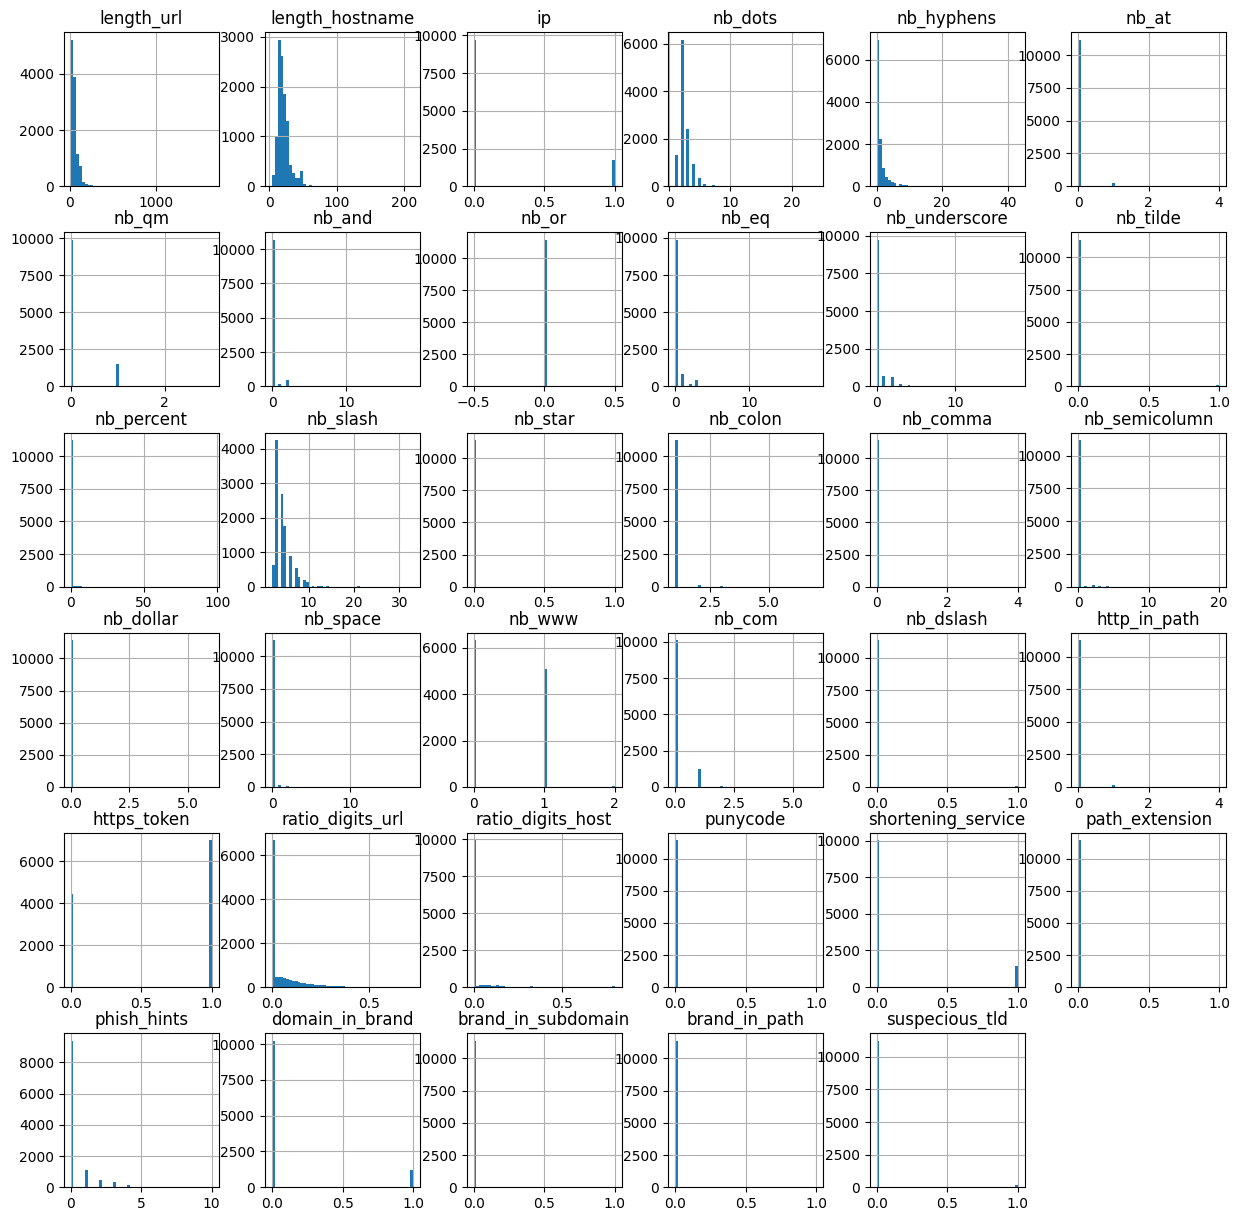

In [26]:
#Plotting the data distribution
data.hist(bins = 50,figsize = (15,15))
plt.show()

<Axes: >

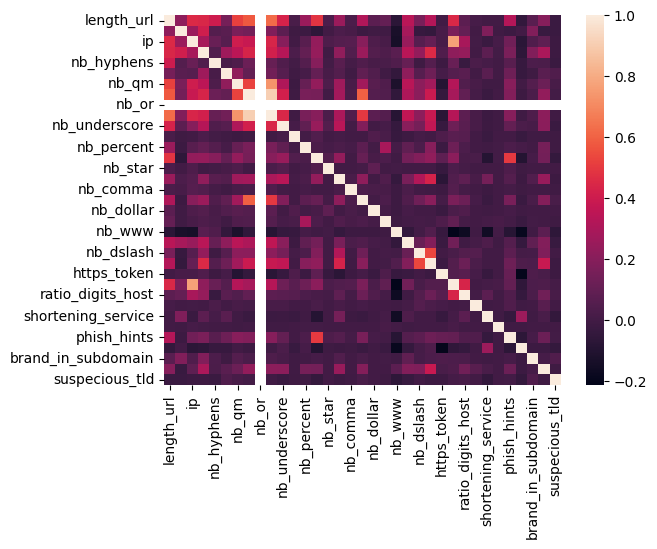

In [36]:
data1 = data.select_dtypes(['number'])
sns.heatmap(data1.corr())


In [37]:
data1.head(5)

,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,nb_eq,...,ratio_digits_url,ratio_digits_host,punycode,shortening_service,path_extension,phish_hints,domain_in_brand,brand_in_subdomain,brand_in_path,suspecious_tld
0,37,19,0,3,0,0,0,0,0,0,...,0.000000,0.0,0,0,0,0,0,0,0,0
1,77,23,1,1,0,0,0,0,0,0,...,0.220779,0.0,0,0,0,0,0,0,0,0
2,126,50,1,4,1,0,1,2,0,3,...,0.150794,0.0,0,0,0,0,0,0,0,0
3,18,11,0,2,0,0,0,0,0,0,...,0.000000,0.0,0,0,0,0,0,0,0,0
4,55,15,0,2,2,0,0,0,0,0,...,0.000000,0.0,0,0,0,0,0,0,0,0


## **5. Data Preprocessing & EDA**
Here, we clean the data by applying data preprocesssing techniques and transform the data to use it in the models.

In [30]:
data.describe()

,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,nb_eq,...,ratio_digits_url,ratio_digits_host,punycode,shortening_service,path_extension,phish_hints,domain_in_brand,brand_in_subdomain,brand_in_path,suspecious_tld
count,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.0,11430.000000,...,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000
mean,61.126684,21.090289,0.150569,2.480752,0.997550,0.022222,0.141207,0.162292,0.0,0.293176,...,0.053137,0.025024,0.000350,0.123447,0.000175,0.327734,0.104199,0.004112,0.004899,0.017935
std,55.297318,10.777171,0.357644,1.369686,2.087087,0.155500,0.364456,0.821337,0.0,0.998317,...,0.089363,0.093422,0.018705,0.328964,0.013227,0.842600,0.305533,0.063996,0.069827,0.132722
min,12.000000,4.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,33.000000,15.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,47.000000,19.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,71.000000,24.000000,0.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.079365,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1641.000000,214.000000,1.000000,24.000000,43.000000,4.000000,3.000000,19.000000,0.0,19.000000,...,0.723881,0.800000,1.000000,1.000000,1.000000,10.000000,1.000000,1.000000,1.000000,1.000000


The above obtained result shows that the most of the data is made of 0's & 1's except 'Domain' & 'URL_Depth' columns. The Domain column doesnt have any significance to the machine learning model training. So dropping the *'Domain'* column from the dataset. 

This leaves us with 16 features & a target column. The *'URL_Depth'* maximum value is 20. According to my understanding, there is no necessity to change this column.

In [31]:
#checking the data for null or missing values
data.isnull().sum()

length_url            0
length_hostname       0
ip                    0
nb_dots               0
nb_hyphens            0
nb_at                 0
nb_qm                 0
nb_and                0
nb_or                 0
nb_eq                 0
nb_underscore         0
nb_tilde              0
nb_percent            0
nb_slash              0
nb_star               0
nb_colon              0
nb_comma              0
nb_semicolumn         0
nb_dollar             0
nb_space              0
nb_www                0
nb_com                0
nb_dslash             0
http_in_path          0
https_token           0
ratio_digits_url      0
ratio_digits_host     0
punycode              0
shortening_service    0
path_extension        0
phish_hints           0
domain_in_brand       0
brand_in_subdomain    0
brand_in_path         0
suspecious_tld        0
dtype: int64

In the feature extraction file, the extracted features of legitmate & phishing url datasets are just concatenated without any shuffling. This resulted in top 5000 rows of legitimate url data & bottom 5000 of phishing url data. 

To even out the distribution while splitting the data into training & testing sets, we need to shuffle it. This even evades the case of overfitting while model training.

From the above execution, it is clear that the data doesnot have any missing values.

By this, the data is throughly preprocessed & is ready for training.

## **6. Splitting the Data**

In [38]:
# Sepratating & assigning features and target columns to X & y
X = data1
X.shape, y.shape

((11430, 35), (11430,))

In [39]:
# Splitting the dataset into train and test sets: 80-20 split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 12)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=12)
X_train.shape, X_test.shape, X_valid.shape

((7315, 35), (2286, 35), (1829, 35))

## **7. Machine Learning Models & Training**

From the dataset above, it is clear that this is a supervised machine learning task. There are two major types of supervised machine learning problems, called classification and regression. 

This data set comes under classification problem, as the input URL is classified as phishing (1) or legitimate (0). The supervised machine learning models (classification) considered to train the dataset in this notebook are:
* Decision Tree
* Random Forest
* Multilayer Perceptrons
* XGBoost
* Autoencoder Neural Network
* Support Vector Machines

In [40]:
#importing packages
from sklearn.metrics import accuracy_score

In [41]:
# Creating holders to store the model performance results
ML_Model = []
acc_train = []
acc_valid = []
acc_test = []

#function to call for storing the results
def storeResults(model, a, b, c):
  ML_Model.append(model)
  acc_train.append(round(a, 3))
  acc_valid.append(round(c, 3))
  acc_test.append(round(b, 3))

### **7.1. Decision Tree Classifier**
 Decision trees are widely used models for classification and regression tasks. Essentially, they learn a hierarchy of if/else questions, leading to a decision. Learning a decision tree means learning the sequence of if/else questions that gets us to the true answer most quickly.
 
In the machine learning setting, these questions are called tests (not to be confused with the test set, which is the data we use to test to see how generalizable our model is). To build a tree, the algorithm searches over all possible tests and finds the one that is most informative about the target variable.

In [42]:
# Decision Tree model 
from sklearn.tree import DecisionTreeClassifier

# instantiate the model 
tree = DecisionTreeClassifier(max_depth = 15, criterion="entropy")
# fit the model 
tree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=15)

In [43]:
#predicting the target value from the model for the samples
y_test_tree = tree.predict(X_test)
y_valid_tree = tree.predict(X_valid)
y_train_tree = tree.predict(X_train)

**Performance Evaluation:**

In [44]:
#computing the accuracy of the model performance
acc_train_tree = accuracy_score(y_train,y_train_tree)
acc_valid_tree = accuracy_score(y_valid,y_valid_tree)
acc_test_tree = accuracy_score(y_test,y_test_tree)

print("Decision Tree: Accuracy on training Data: {:.3f}".format(acc_train_tree))
print("Decision Tree: Accuracy on Validation Data: {:.3f}".format(acc_valid_tree))
print("Decision Tree: Accuracy on test Data: {:.3f}".format(acc_test_tree))

Decision Tree: Accuracy on training Data: 0.944
Decision Tree: Accuracy on Validation Data: 0.866
Decision Tree: Accuracy on test Data: 0.863


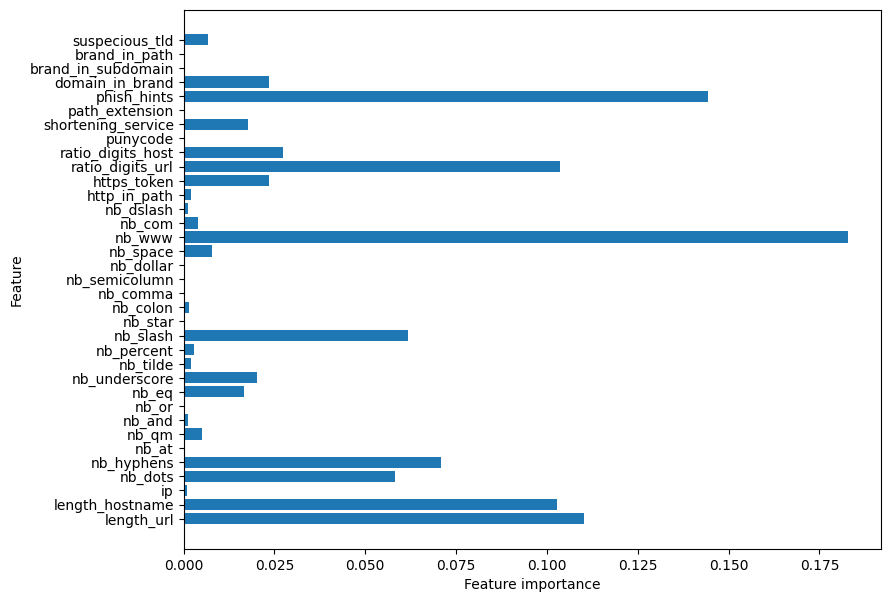

In [45]:
#checking the feature improtance in the model
plt.figure(figsize=(9,7))
n_features = X_train.shape[1]
plt.barh(range(n_features), tree.feature_importances_, align='center')
plt.yticks(np.arange(n_features), X_train.columns)
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.show()

**Storing the results:**

In [46]:
storeResults('Decision Tree', acc_train_tree, acc_valid_tree, acc_test_tree)

### **7.2. Random Forest Classifier**
Random forests for regression and classification are currently among the most widely used machine learning methods.A random forest is essentially a collection of decision trees, where each tree is slightly different from the others. The idea behind random forests is that each tree might do a relatively good job of predicting, but will likely overfit on part of the data.

If we build many trees, all of which work well and overfit in different ways, we can reduce the amount of overfitting by averaging their results. To build a random forest model, you need to decide on the number of trees to build (the n_estimators parameter of RandomForestRegressor or RandomForestClassifier). They are very powerful, often work well without heavy tuning of the parameters, and don’t require scaling of the data.

In [47]:
# Random Forest model
from sklearn.ensemble import RandomForestClassifier

# instantiate the model
forest = RandomForestClassifier(max_depth=16)

# fit the model 
forest.fit(X_train, y_train)


RandomForestClassifier(max_depth=16)

In [48]:
#predicting the target value from the model for the samples
y_test_forest = forest.predict(X_test)
y_valid_forest = forest.predict(X_valid)
y_train_forest = forest.predict(X_train)

**Performance Evaluation:**

In [49]:
#computing the accuracy of the model performance
acc_train_forest = accuracy_score(y_train,y_train_forest)
acc_valid_forest = accuracy_score(y_valid,y_valid_forest)
acc_test_forest = accuracy_score(y_test,y_test_forest)

print("Random forest: Accuracy on training Data: {:.3f}".format(acc_train_forest))
print("Random forest: Accuracy on Validation Data: {:.3f}".format(acc_valid_forest))
print("Random forest: Accuracy on test Data: {:.3f}".format(acc_test_forest))

Random forest: Accuracy on training Data: 0.948
Random forest: Accuracy on Validation Data: 0.896
Random forest: Accuracy on test Data: 0.888


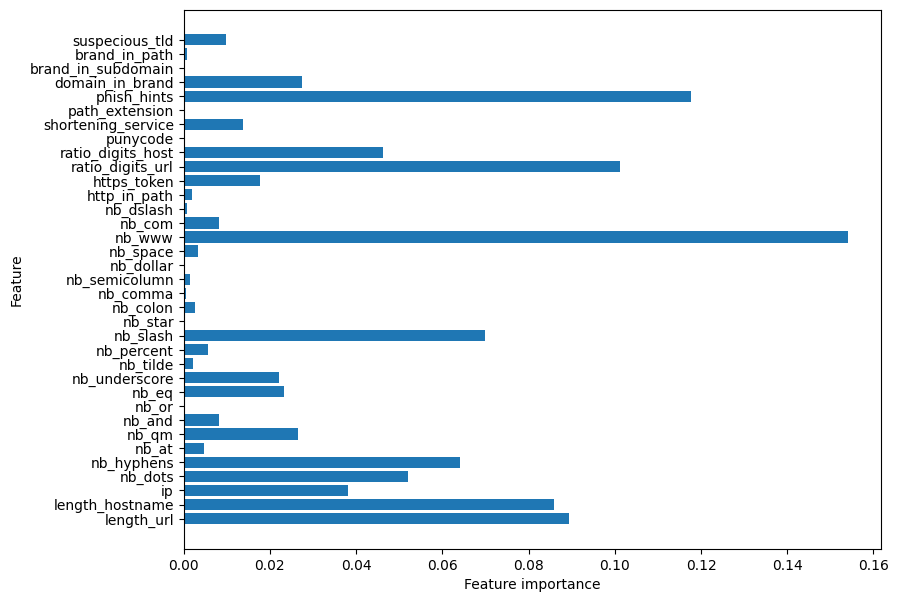

In [50]:
#checking the feature improtance in the model
plt.figure(figsize=(9,7))
n_features = X_train.shape[1]
plt.barh(range(n_features), forest.feature_importances_, align='center')
plt.yticks(np.arange(n_features), X_train.columns)
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.show()

**Storing the results:**

In [51]:
storeResults('Random Forest', acc_train_forest, acc_valid_forest, acc_test_forest)

### **7.3. Multilayer Perceptrons (MLPs): Deep Learning**
Multilayer perceptrons (MLPs) are also known as (vanilla) feed-forward neural networks, or sometimes just neural networks. Multilayer perceptrons can be applied for both classification and regression problems.

MLPs can be viewed as generalizations of linear models that perform multiple stages of processing to come to a decision using Non-linear activation function. The loss function in MLP is Binary Cross Entropy(classification) and MSE(Regression).

Steps:
1. Forward Propagation
2. Activation Function (sigmoid, ReLU, Tanh)
3. Loss Function
4. Backpropagation
5. Optimization(Adam Optimizer)

In [52]:
# Multilayer Perceptrons model
from sklearn.neural_network import MLPClassifier

# instantiate the model
mlp = MLPClassifier(alpha=0.001, hidden_layer_sizes=([100, 100, 100]))

# fit the model 
mlp.fit(X_train, y_train)

c:\Users\Piyush\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(alpha=0.001, hidden_layer_sizes=[100, 100, 100])

In [53]:
#predicting the target value from the model for the samples
y_test_mlp = mlp.predict(X_test)
y_valid_mlp = mlp.predict(X_valid)
y_train_mlp = mlp.predict(X_train)

**Performance Evaluation:**

In [55]:
#computing the accuracy of the model performance
acc_train_mlp = accuracy_score(y_train,y_train_mlp)
acc_valid_mlp = accuracy_score(y_valid,y_valid_mlp)
acc_test_mlp = accuracy_score(y_test,y_test_mlp)

print("Multilayer Perceptrons: Accuracy on training Data: {:.3f}".format(acc_train_mlp))
print("Multilayer Perceptrons: Accuracy on validation Data: {:.3f}".format(acc_valid_mlp))
print("Multilayer Perceptrons: Accuracy on test Data: {:.3f}".format(acc_test_mlp))

Multilayer Perceptrons: Accuracy on training Data: 0.924
Multilayer Perceptrons: Accuracy on validation Data: 0.882
Multilayer Perceptrons: Accuracy on test Data: 0.889


**Storing the results:**

In [56]:
storeResults('Multilayer Perceptrons', acc_train_mlp, acc_valid_mlp, acc_test_mlp)

### **7.4. XGBoost Classifier**
XGBoost is one of the most popular machine learning algorithms these days. XGBoost stands for eXtreme Gradient Boosting. Regardless of the type of prediction task at hand; regression or classification. XGBoost is an implementation of gradient boosted decision trees designed for speed and performance. It uses parallel processing to train models. 
Loss function = ∑ l(yi ,y^i) + ∑Ω(fk)

It prevents overfitting by learning rate or shrinkage.

In [57]:
#XGBoost Classification model
from xgboost import XGBClassifier

# instantiate the model
xgb = XGBClassifier(learning_rate = 0.6, max_depth=7)
#fit the model
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.6, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=7,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [58]:
#predicting the target value from the model for the samples
y_test_xgb = xgb.predict(X_test)
y_valid_xgb = xgb.predict(X_valid)
y_train_xgb = xgb.predict(X_train)

**Performance Evaluation:**

In [59]:
#computing the accuracy of the model performance
acc_train_xgb = accuracy_score(y_train,y_train_xgb)
acc_valid_xgb = accuracy_score(y_valid,y_valid_xgb)
acc_test_xgb = accuracy_score(y_test,y_test_xgb)

print("XGBoost: Accuracy on training Data: {:.3f}".format(acc_train_xgb))
print("XGBoost: Accuracy on training Data: {:.3f}".format(acc_valid_xgb))
print("XGBoost : Accuracy on test Data: {:.3f}".format(acc_test_xgb))

XGBoost: Accuracy on training Data: 0.975
XGBoost: Accuracy on training Data: 0.888
XGBoost : Accuracy on test Data: 0.886


**Storing the results:**

In [60]:
storeResults('XGBoost', acc_train_xgb, acc_valid_xgb, acc_test_xgb)

### **7.5 Ada Boost**
AdaBoost is an ensemble machine learning model that creates a sequence of weighted decision trees, typically using shallow trees (often just single-level “stumps”). Each tree is trained on the entire dataset, but with adaptive sample weights that give more importance to previously misclassified examples. For classification tasks, AdaBoost combines the trees through a weighted voting system, where better-performing trees get more influence in the final decision.

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

adaboost = AdaBoostClassifier()

adaboost.fit(X_train, y_train)

AdaBoostClassifier()

In [64]:
#predicting the target value from the model for the samples
y_test_ada = adaboost.predict(X_test)
y_valid_ada = adaboost.predict(X_valid)
y_train_ada = adaboost.predict(X_train)

**Performance Evaluation:**

In [65]:
#computing the accuracy of the model performance
acc_train_ada = accuracy_score(y_train,y_train_ada)
acc_valid_ada = accuracy_score(y_valid,y_valid_ada)
acc_test_ada = accuracy_score(y_test,y_test_ada)

print("XGBoost: Accuracy on training Data: {:.3f}".format(acc_train_ada))
print("XGBoost: Accuracy on training Data: {:.3f}".format(acc_valid_ada))
print("XGBoost : Accuracy on test Data: {:.3f}".format(acc_test_ada))

XGBoost: Accuracy on training Data: 0.826
XGBoost: Accuracy on training Data: 0.827
XGBoost : Accuracy on test Data: 0.825


**Storing the results:**

In [66]:
storeResults('AdaBoost', acc_train_ada, acc_valid_ada, acc_test_ada)

### **7.6. Support Vector Machines**

In machine learning, support-vector machines (SVMs, also support-vector networks) are supervised learning models with associated learning algorithms that analyze data used for classification and regression analysis. Given a set of training examples, each marked as belonging to one or the other of two categories, an SVM training algorithm builds a model that assigns new examples to one category or the other, making it a non-probabilistic binary linear classifier.

In [113]:
#Support vector machine model
from sklearn.svm import SVC

# instantiate the model
svm = SVC(kernel='poly', C = 100, random_state=12)
#fit the model
svm.fit(X_train, y_train)

SVC(C=100, kernel='poly', random_state=12)

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# Define a range of C values to test
param_grid = {
    'C': [0.01, 0.1, 1, 10, 20, 50, 100],
    'kernel': ['poly'],  # You can test 'rbf', 'linear', etc. too
    'degree': [2, 3, 4]  # Optional: tune degree for polynomial kernel
}

# Set up the GridSearchCV
grid = GridSearchCV(SVC(random_state=12), param_grid, cv=5, scoring='accuracy')
grid.fit(X_train, y_train)

# Best parameters and best score
print("Best C:", grid.best_params_['C'])
print("Best validation accuracy:", grid.best_score_)


In [115]:
#predicting the target value from the model for the samples
y_test_svm = svm.predict(X_test)
y_valid_svm = svm.predict(X_valid)
y_train_svm = svm.predict(X_train)

**Performance Evaluation:**

In [116]:
#computing the accuracy of the model performance
acc_train_svm = accuracy_score(y_train,y_train_svm)
acc_valid_svm = accuracy_score(y_valid,y_valid_svm)
acc_test_svm = accuracy_score(y_test,y_test_svm)

print("SVM : Accuracy on training Data: {:.3f}".format(acc_train_svm))
print("SVM : Accuracy on valid Data: {:.3f}".format(acc_valid_svm))
print("SVM : Accuracy on test Data: {:.3f}".format(acc_test_svm))

SVM : Accuracy on training Data: 0.775
SVM : Accuracy on valid Data: 0.771
SVM : Accuracy on test Data: 0.763


**Storing the results:**

In [117]:
storeResults('SVM', acc_train_svm, acc_valid_svm, acc_test_svm)

### **7.7 Gradient Boost**
Gradient Boosting is a ensemble learning method used for classification and regression tasks. It is a boosting algorithm which combine multiple weak learner to create a strong predictive model. It works by sequentially training models where each new model tries to correct the errors made by its predecessor.

In gradient boosting each new model is trained to minimize the loss function such as mean squared error or cross-entropy of the previous model using gradient descent. In each iteration the algorithm computes the gradient of the loss function with respect to the predictions and then trains a new weak model to minimize this gradient. The predictions of the new model are then added to the ensemble and the process is repeated until a stopping criterion is met.

In [67]:
from sklearn.ensemble import GradientBoostingClassifier, VotingClassifier

gboost = GradientBoostingClassifier(n_estimators=300,
                                 learning_rate=0.05,
                                 random_state=100,
                                 max_features=5 )
gboost.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.05, max_features=5, n_estimators=300,
                           random_state=100)

In [68]:
#predicting the target value from the model for the samples
y_test_gboost = gboost.predict(X_test)
y_valid_gboost = gboost.predict(X_valid)
y_train_gboost = gboost.predict(X_train)

**Performance Evaluation:**

In [79]:
#computing the accuracy of the model performance
acc_train_gboost = accuracy_score(y_train,y_train_gboost)
acc_valid_gboost = accuracy_score(y_valid,y_valid_gboost)
acc_test_gboost = accuracy_score(y_test,y_test_gboost)

print("Gradient Boosting : Accuracy on training Data: {:.3f}".format(acc_train_gboost))
print("Gradient Boosting : Accuracy on valid Data: {:.3f}".format(acc_valid_gboost))
print("Gradient Boosting : Accuracy on test Data: {:.3f}".format(acc_test_gboost))

Gradient Boosting : Accuracy on training Data: 0.877
Gradient Boosting : Accuracy on valid Data: 0.868
Gradient Boosting : Accuracy on test Data: 0.870


**Storing the results:**

In [71]:
storeResults('Gradient Boosting', acc_train_gboost, acc_valid_gboost, acc_test_gboost)

### **7.8 LightGBM**
LightGBM is an open-source high-performance framework developed by Microsoft. It is an ensemble learning framework that uses gradient boosting method which constructs a strong learner by sequentially adding weak learners in a gradient descent manner.

It’s designed for efficiency, scalability and high accuracy particularly with large datasets. It uses decision trees that grow efficiently by minimizing memory usage and optimizing training time. Key innovations like Gradient-based One-Side Sampling (GOSS), histogram-based algorithms and leaf-wise tree growth enable LightGBM to outperform other frameworks in both speed and accuracy.

In [ ]:
from lightgbm import LGBMClassifier

lgboost = LGBMClassifier(learning_rate=0.09,max_depth=-5,random_state=42)

lgboost.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 3658, number of negative: 3657
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001196 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 870
[LightGBM] [Info] Number of data points in the train set: 7315, number of used features: 29
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500068 -> initscore=0.000273
[LightGBM] [Info] Start training from score 0.000273


LGBMClassifier(learning_rate=0.09, max_depth=-5, random_state=42)

In [75]:
#predicting the target value from the model for the samples
y_test_lgboost = lgboost.predict(X_test)
y_valid_lgboost = lgboost.predict(X_valid)
y_train_lgboost = lgboost.predict(X_train)

**Performance Evaluation:**

In [77]:
#computing the accuracy of the model performance
acc_train_lgboost = accuracy_score(y_train,y_train_lgboost)
acc_valid_lgboost = accuracy_score(y_valid,y_valid_lgboost)
acc_test_lgboost = accuracy_score(y_test,y_test_lgboost)

print("LightGBM : Accuracy on training Data: {:.3f}".format(acc_train_lgboost))
print("LightGBM : Accuracy on valid Data: {:.3f}".format(acc_valid_lgboost))
print("LightGBM : Accuracy on test Data: {:.3f}".format(acc_test_lgboost))

LightGBM : Accuracy on training Data: 0.929
LightGBM : Accuracy on valid Data: 0.887
LightGBM : Accuracy on test Data: 0.892


**Storing the results:**

In [78]:
storeResults('LightGBM', acc_train_lgboost, acc_valid_lgboost, acc_test_lgboost)

### **7.9 Catboost**
CatBoost is based on the concept of gradient boosting technique where decision trees are built sequentially to minimize errors and improve predictions. The process works by constructing a decision tree and evaluating how much error are there in predictions. Once the first tree is built the next tree is created to correct the errors made by the previous one. This process continues iteratively with each new tree focusing on improving the model’s predictions by reducing previous errors this process continue till a predefined number of iterations met. The result is a ensemble of decision trees that work together to provide accurate predictions.

It is particularly well-suited for large-scale datasets with many independent features. Unlike other gradient boosting algorithms CatBoost is specifically designed to handle both categorical and numerical features seamlessly without requiring manual feature encoding.

In [82]:
from catboost import CatBoostClassifier

catboost = CatBoostClassifier(iterations=100, depth=8, learning_rate=0.1, loss_function='Logloss', custom_metric=['AUC'], random_seed=42)

catboost.fit(X_train, y_train)

0:	learn: 0.6242486	total: 12.5ms	remaining: 1.23s
1:	learn: 0.5701373	total: 25.9ms	remaining: 1.27s
2:	learn: 0.5212993	total: 38.6ms	remaining: 1.25s
3:	learn: 0.4889126	total: 49.7ms	remaining: 1.19s
4:	learn: 0.4572752	total: 61ms	remaining: 1.16s
5:	learn: 0.4333130	total: 72.5ms	remaining: 1.14s
6:	learn: 0.4137284	total: 86.1ms	remaining: 1.14s
7:	learn: 0.3998991	total: 97.4ms	remaining: 1.12s
8:	learn: 0.3865651	total: 109ms	remaining: 1.1s
9:	learn: 0.3760065	total: 120ms	remaining: 1.08s
10:	learn: 0.3661095	total: 131ms	remaining: 1.06s
11:	learn: 0.3585093	total: 142ms	remaining: 1.04s
12:	learn: 0.3514254	total: 152ms	remaining: 1.02s
13:	learn: 0.3442208	total: 163ms	remaining: 1s
14:	learn: 0.3395437	total: 173ms	remaining: 982ms
15:	learn: 0.3331112	total: 185ms	remaining: 972ms
16:	learn: 0.3273137	total: 197ms	remaining: 961ms
17:	learn: 0.3238877	total: 209ms	remaining: 951ms
18:	learn: 0.3212556	total: 220ms	remaining: 937ms
19:	learn: 0.3166059	total: 232ms	remai

In [83]:
#predicting the target value from the model for the samples
y_test_catboost = catboost.predict(X_test)
y_valid_catboost = catboost.predict(X_valid)
y_train_catboost = catboost.predict(X_train)

**Performance Evaluation:**

In [91]:
#computing the accuracy of the model performance
acc_train_catboost = accuracy_score(y_train,y_train_catboost)
acc_valid_catboost = accuracy_score(y_valid,y_valid_catboost)
acc_test_catboost = accuracy_score(y_test,y_test_catboost)

print("Cat Boosting : Accuracy on training Data: {:.3f}".format(acc_train_catboost))
print("Cat Boosting : Accuracy on valid Data: {:.3f}".format(acc_valid_catboost))
print("Cat Boosting : Accuracy on test Data: {:.3f}".format(acc_test_catboost))

Cat Boosting : Accuracy on training Data: 0.922
Cat Boosting : Accuracy on valid Data: 0.893
Cat Boosting : Accuracy on test Data: 0.892


**Storing the results:**

In [85]:
storeResults('CatBoost', acc_train_catboost, acc_valid_catboost, acc_test_catboost)

### **7.10 Combined - Random Forest & Gradient Boost**

In [86]:
from sklearn.ensemble import VotingClassifier

combined1 = VotingClassifier(estimators=[('rf', RandomForestClassifier()),
    ('xgb', XGBClassifier(use_label_encoder=False, eval_metric='logloss'))
], voting='soft')

combined1.fit(X_train, y_train)

c:\Users\Piyush\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\training.py:183: UserWarning: [14:44:49] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


VotingClassifier(estimators=[('rf', RandomForestClassifier()),
                             ('xgb',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric='logloss',
                                            feature_types=None,
                                            feature_weights=None, gamma=None,
                                            grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=None, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=None, n_jobs=None,
                                            num_parallel_tree=None, ...))],
                 voting='soft')

In [87]:
#predicting the target value from the model for the samples
y_test_combined1 = combined1.predict(X_test)
y_valid_combined1 = combined1.predict(X_valid)
y_train_combined1 = combined1.predict(X_train)

**Performance Evaluation:**

In [90]:
#computing the accuracy of the model performance
acc_train_combined1 = accuracy_score(y_train,y_train_combined1)
acc_valid_combined1 = accuracy_score(y_valid,y_valid_combined1)
acc_test_combined1 = accuracy_score(y_test,y_test_combined1)

print("Random Forest + Gradient Boosting : Accuracy on training Data: {:.3f}".format(acc_train_combined1))
print("Random Forest + Gradient Boosting : Accuracy on valid Data: {:.3f}".format(acc_valid_combined1))
print("Random Forest + Gradient Boosting : Accuracy on test Data: {:.3f}".format(acc_test_combined1))

Random Forest + Gradient Boosting : Accuracy on training Data: 0.975
Random Forest + Gradient Boosting : Accuracy on valid Data: 0.903
Random Forest + Gradient Boosting : Accuracy on test Data: 0.891


**Storing the results:**

In [89]:
storeResults('Random Forest + Gradient Boosting', acc_train_combined1, acc_valid_combined1, acc_test_combined1)

### **7.11 Combined - Cat Boost & LightGBM**

In [95]:
from sklearn.ensemble import VotingClassifier

combined2 = VotingClassifier(estimators=[('cboost', CatBoostClassifier()),
    ('lgbm', LGBMClassifier())
], voting='soft')

combined2.fit(X_train, y_train)

Learning rate set to 0.024096
0:	learn: 0.6763964	total: 3.06ms	remaining: 3.06s
1:	learn: 0.6608445	total: 6.33ms	remaining: 3.16s
2:	learn: 0.6456509	total: 9.34ms	remaining: 3.1s
3:	learn: 0.6326083	total: 12.3ms	remaining: 3.05s
4:	learn: 0.6186504	total: 15.3ms	remaining: 3.04s
5:	learn: 0.6074940	total: 18.3ms	remaining: 3.03s
6:	learn: 0.5956672	total: 21.2ms	remaining: 3.01s
7:	learn: 0.5852351	total: 24.1ms	remaining: 2.99s
8:	learn: 0.5753898	total: 27ms	remaining: 2.98s
9:	learn: 0.5653369	total: 29.9ms	remaining: 2.96s
10:	learn: 0.5555841	total: 32.9ms	remaining: 2.96s
11:	learn: 0.5462866	total: 36.3ms	remaining: 2.99s
12:	learn: 0.5378573	total: 39.4ms	remaining: 2.99s
13:	learn: 0.5290132	total: 42.6ms	remaining: 3s
14:	learn: 0.5206516	total: 45.7ms	remaining: 3s
15:	learn: 0.5135864	total: 49.2ms	remaining: 3.02s
16:	learn: 0.5062496	total: 52.9ms	remaining: 3.06s
17:	learn: 0.5007853	total: 56.3ms	remaining: 3.07s
18:	learn: 0.4939336	total: 59.4ms	remaining: 3.06s
1

VotingClassifier(estimators=[('cboost',
                              <catboost.core.CatBoostClassifier object at 0x00000184875A4810>),
                             ('lgbm', LGBMClassifier())],
                 voting='soft')

In [96]:
#predicting the target value from the model for the samples
y_test_combined2 = combined2.predict(X_test)
y_valid_combined2 = combined2.predict(X_valid)
y_train_combined2 = combined2.predict(X_train)

**Performance Evaluation:**

In [98]:
#computing the accuracy of the model performance
acc_train_combined2 = accuracy_score(y_train,y_train_combined2)
acc_valid_combined2 = accuracy_score(y_valid,y_valid_combined2)
acc_test_combined2 = accuracy_score(y_test,y_test_combined2)

print("Catboost + Light GBM : Accuracy on training Data: {:.3f}".format(acc_train_combined2))
print("Catboost + Light GBM : Accuracy on valid Data: {:.3f}".format(acc_valid_combined2))
print("Catboost + Light GBM : Accuracy on test Data: {:.3f}".format(acc_test_combined2))

Catboost + Light GBM : Accuracy on training Data: 0.933
Catboost + Light GBM : Accuracy on valid Data: 0.897
Catboost + Light GBM : Accuracy on test Data: 0.895


**Storing the results:**

In [99]:
storeResults('Catboost + Light GBM', acc_train_combined1, acc_valid_combined1, acc_test_combined1)

### **7.12 Combined - Decision Tree & SVC**

In [100]:
combined3 = VotingClassifier(estimators=[
    ('dt', DecisionTreeClassifier()),
    ('svm', SVC(probability=True))
], voting='soft')

combined3.fit(X_train, y_train)

VotingClassifier(estimators=[('dt', DecisionTreeClassifier()),
                             ('svm', SVC(probability=True))],
                 voting='soft')

In [101]:
#predicting the target value from the model for the samples
y_test_combined3 = combined3.predict(X_test)
y_valid_combined3 = combined3.predict(X_valid)
y_train_combined3 = combined3.predict(X_train)

**Performance Evaluation:**

In [102]:
#computing the accuracy of the model performance
acc_train_combined3 = accuracy_score(y_train,y_train_combined3)
acc_valid_combined3 = accuracy_score(y_valid,y_valid_combined3)
acc_test_combined3 = accuracy_score(y_test,y_test_combined3)

print("Decision Tree + SVC : Accuracy on training Data: {:.3f}".format(acc_train_combined3))
print("Decision Tree + SVC : Accuracy on valid Data: {:.3f}".format(acc_valid_combined3))
print("Decision Tree + SVC : Accuracy on test Data: {:.3f}".format(acc_test_combined3))

Decision Tree + SVC : Accuracy on training Data: 0.987
Decision Tree + SVC : Accuracy on valid Data: 0.856
Decision Tree + SVC : Accuracy on test Data: 0.847


**Storing the results:**

In [103]:
storeResults('Decision Tree + SVC ', acc_train_combined3, acc_valid_combined3, acc_test_combined3)

### **7.13 Combined - Random Forest & SVC**

In [104]:
combined4 = VotingClassifier(estimators=[
    ('rf', RandomForestClassifier()),
    ('svm', SVC(probability=True))
], voting='soft')

combined4.fit(X_train, y_train)

VotingClassifier(estimators=[('rf', RandomForestClassifier()),
                             ('svm', SVC(probability=True))],
                 voting='soft')

In [105]:
#predicting the target value from the model for the samples
y_test_combined4 = combined4.predict(X_test)
y_valid_combined4 = combined4.predict(X_valid)
y_train_combined4 = combined4.predict(X_train)

**Performance Evaluation:**

In [107]:
#computing the accuracy of the model performance
acc_train_combined4 = accuracy_score(y_train,y_train_combined4)
acc_valid_combined4 = accuracy_score(y_valid,y_valid_combined4)
acc_test_combined4 = accuracy_score(y_test,y_test_combined4)

print("Random Forest + SVC : Accuracy on training Data: {:.3f}".format(acc_train_combined4))
print("Random Forest + SVC : Accuracy on valid Data: {:.3f}".format(acc_valid_combined4))
print("Random Forest + SVC : Accuracy on test Data: {:.3f}".format(acc_test_combined4))

Random Forest + SVC : Accuracy on training Data: 0.964
Random Forest + SVC : Accuracy on valid Data: 0.879
Random Forest + SVC : Accuracy on test Data: 0.872


**Storing the results:**

In [108]:
storeResults('Random Forest + SVC ', acc_train_combined4, acc_valid_combined4, acc_test_combined4)

## **8. Comparision of Models**
To compare the models performance, a dataframe is created. The columns of this dataframe are the lists created to store the results of the model.

In [118]:
#creating dataframe
results = pd.DataFrame({ 'ML Model': ML_Model,    
    'Train Accuracy': acc_train,
    'Valid Accuracy': acc_valid,
    'Test Accuracy': acc_test})
results = results.drop_duplicates()
results

,ML Model,Train Accuracy,Valid Accuracy,Test Accuracy
0,Decision Tree,0.944,0.863,0.866
1,Random Forest,0.948,0.888,0.896
2,Multilayer Perceptrons,0.924,0.889,0.882
3,XGBoost,0.975,0.886,0.888
4,AdaBoost,0.826,0.825,0.827
5,Gradient Boosting,0.877,0.870,0.868
7,LightGBM,0.929,0.892,0.887
8,CatBoost,0.922,0.892,0.893
9,Random Forest + Gradient Boosting,0.975,0.891,0.903
10,Catboost + Light GBM,0.975,0.891,0.903


In [119]:
#Sorting the datafram on accuracy
results.sort_values(by=['Test Accuracy', 'Valid Accuracy', 'Train Accuracy'], ascending=False)

,ML Model,Train Accuracy,Valid Accuracy,Test Accuracy
9,Random Forest + Gradient Boosting,0.975,0.891,0.903
10,Catboost + Light GBM,0.975,0.891,0.903
1,Random Forest,0.948,0.888,0.896
8,CatBoost,0.922,0.892,0.893
3,XGBoost,0.975,0.886,0.888
7,LightGBM,0.929,0.892,0.887
2,Multilayer Perceptrons,0.924,0.889,0.882
12,Random Forest + SVC,0.964,0.872,0.879
5,Gradient Boosting,0.877,0.870,0.868
0,Decision Tree,0.944,0.863,0.866


In [111]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, classification_report

In [120]:
classification_reports = [[classification_report(y_test, y_test_forest), "Random Forest"], 
                      [classification_report(y_test, y_test_mlp), "Multi-Layer Perceptron"],
                      [classification_report(y_test, y_test_svm), "Support Vector Machine"],
                      [classification_report(y_test, y_test_tree), "Decision Tree"],
                      [classification_report(y_test, y_test_xgb), "XG Boost"],
                      [classification_report(y_test, y_test_ada), "Ada Boost"],
                      [classification_report(y_test, y_test_catboost), "Cat Boost"],
                      [classification_report(y_test, y_test_lgboost), "Light GDB"],
                      [classification_report(y_test, y_test_gboost), "Gradient Boosting"],
                      [classification_report(y_test, y_test_combined1), "Catboost + Light GBM"],
                      [classification_report(y_test, y_test_combined2), "Random Forest + Gradient Boosting"],
                      [classification_report(y_test, y_test_combined3), "Decision Tree + SVC"],
                      [classification_report(y_test, y_test_combined4), "Random Forest + SVC"]
                      ]

for report, algo in classification_reports:
    print("Classification report of ", algo)
    print(report)

Classification report of  Random Forest
              precision    recall  f1-score   support

           0       0.88      0.90      0.89      1151
           1       0.89      0.88      0.89      1135

    accuracy                           0.89      2286
   macro avg       0.89      0.89      0.89      2286
weighted avg       0.89      0.89      0.89      2286

Classification report of  Multi-Layer Perceptron
              precision    recall  f1-score   support

           0       0.87      0.91      0.89      1151
           1       0.91      0.86      0.89      1135

    accuracy                           0.89      2286
   macro avg       0.89      0.89      0.89      2286
weighted avg       0.89      0.89      0.89      2286

Classification report of  Support Vector Machine
              precision    recall  f1-score   support

           0       0.70      0.94      0.80      1151
           1       0.90      0.59      0.71      1135

    accuracy                           0.76 

In [121]:
confusion_matrices = [[confusion_matrix(y_test, y_test_forest), "Random Forest"], 
                      [confusion_matrix(y_test, y_test_mlp), "Multi-Layer Perceptron"],
                      [confusion_matrix(y_test, y_test_svm), "Support Vector Machine"],
                      [confusion_matrix(y_test, y_test_tree), "Decision Tree"],
                      [confusion_matrix(y_test, y_test_xgb), "XG Boost"],
                      [confusion_matrix(y_test, y_test_ada), "Ada Boost"],
                      [confusion_matrix(y_test, y_test_catboost), "Cat Boost"],
                      [confusion_matrix(y_test, y_test_lgboost), "Light GDB"],
                      [confusion_matrix(y_test, y_test_gboost), "Gradient Boosting"],
                      [confusion_matrix(y_test, y_test_combined1), "Catboost + Light GBM"],
                      [confusion_matrix(y_test, y_test_combined2), "Random Forest + Gradient Boosting"],
                      [confusion_matrix(y_test, y_test_combined3), "Decision Tree + SVC"],
                      [confusion_matrix(y_test, y_test_combined4), "Random Forest + SVC"]
                      ]

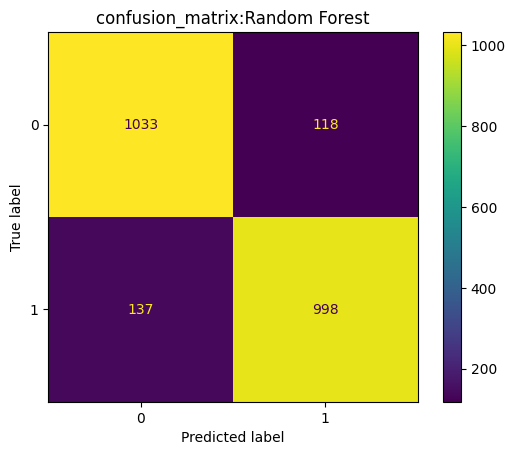

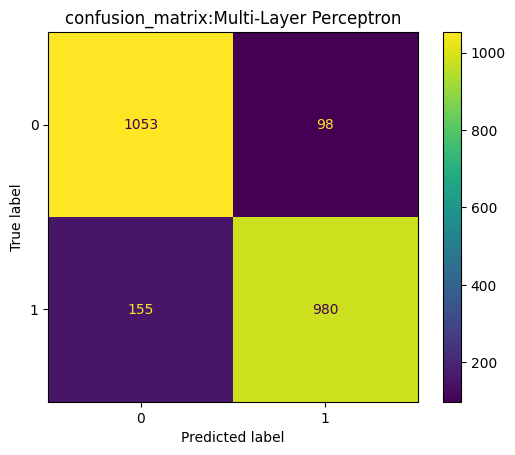

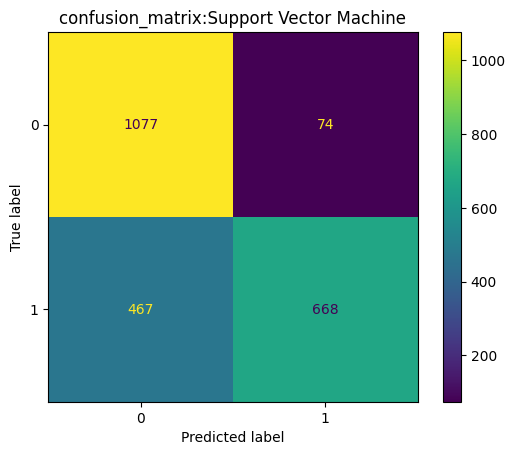

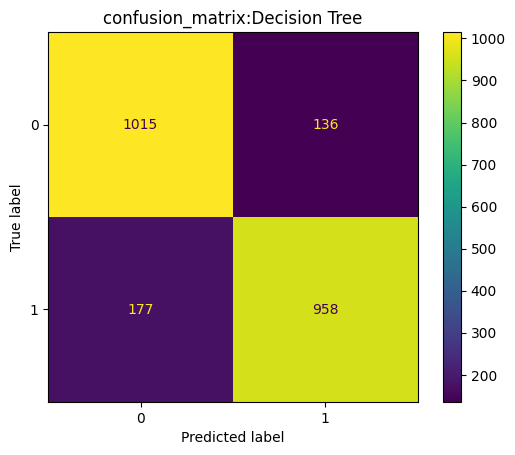

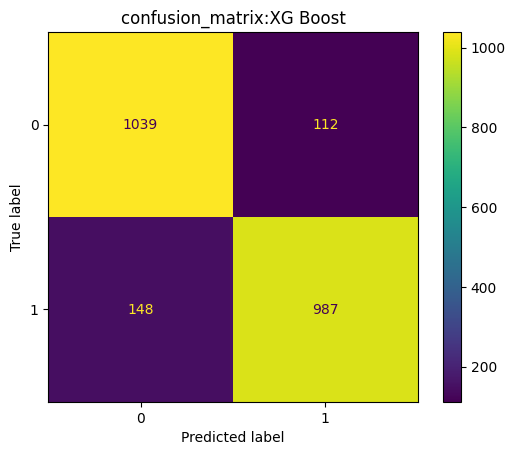

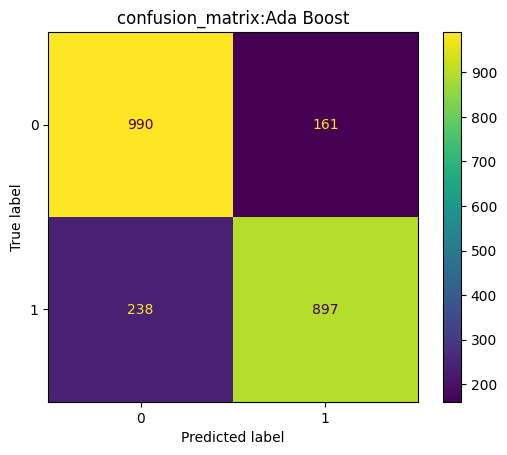

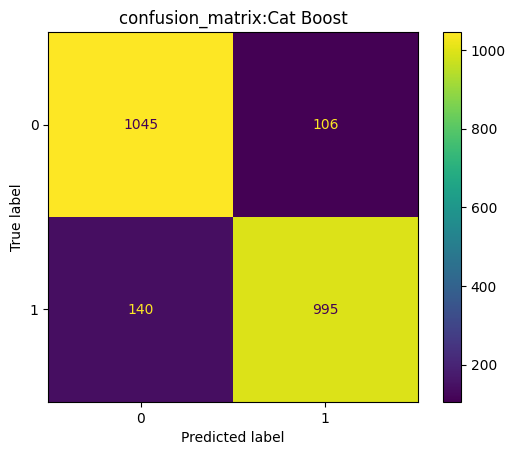

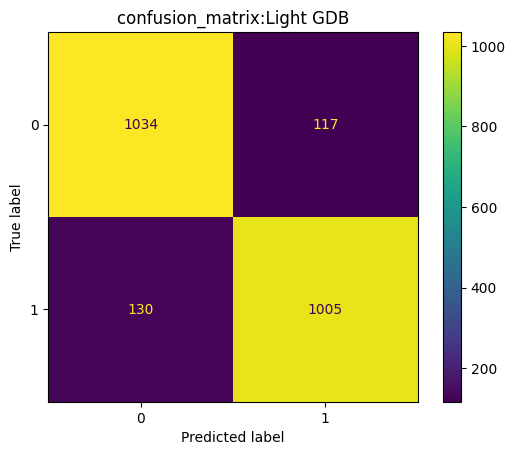

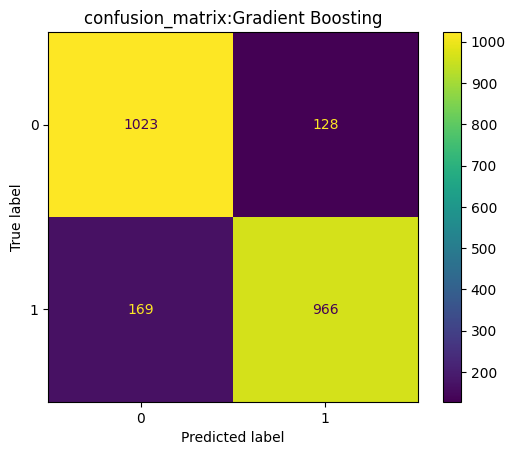

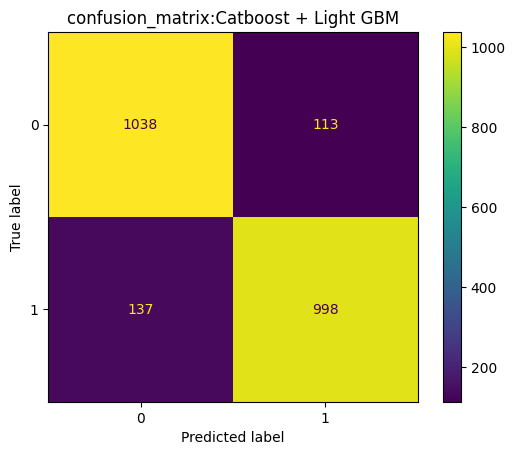

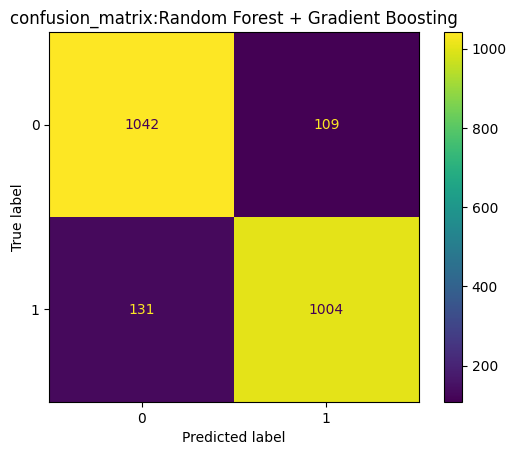

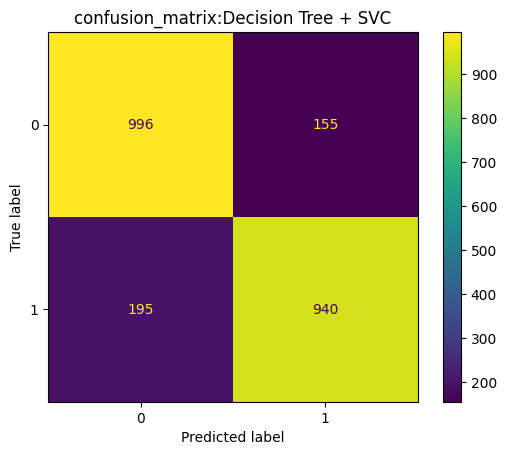

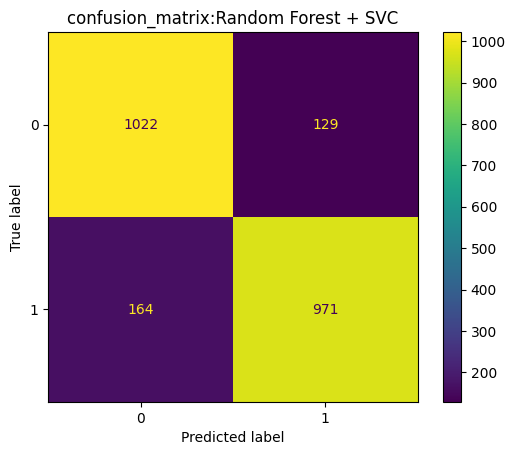

In [123]:
from sklearn import metrics
for confusion_mat, algo in confusion_matrices:
    cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_mat, display_labels = [0, 1])
    cm_display.plot()
    plt.title("confusion_matrix:" + algo)
    plt.show()

### **7.12 Combined - Decision Tree & SVC**

In [ ]:
combined3 = VotingClassifier(estimators=[
    ('dt', DecisionTreeClassifier()),
    ('svm', SVC(probability=True))
], voting='soft')

combined3.fit(X_train, y_train)

VotingClassifier(estimators=[('dt', DecisionTreeClassifier()),
                             ('svm', SVC(probability=True))],
                 voting='soft')

In [ ]:
#predicting the target value from the model for the samples
y_test_combined3 = combined3.predict(X_test)
y_valid_combined3 = combined3.predict(X_valid)
y_train_combined3 = combined3.predict(X_train)

**Performance Evaluation:**

In [ ]:
#computing the accuracy of the model performance
acc_train_combined3 = accuracy_score(y_train,y_train_combined3)
acc_valid_combined3 = accuracy_score(y_valid,y_valid_combined3)
acc_test_combined3 = accuracy_score(y_test,y_test_combined3)

print("Decision Tree + SVC : Accuracy on training Data: {:.3f}".format(acc_train_combined3))
print("Decision Tree + SVC : Accuracy on valid Data: {:.3f}".format(acc_valid_combined3))
print("Decision Tree + SVC : Accuracy on test Data: {:.3f}".format(acc_test_combined3))

Decision Tree + SVC : Accuracy on training Data: 0.987
Decision Tree + SVC : Accuracy on valid Data: 0.856
Decision Tree + SVC : Accuracy on test Data: 0.847


**Storing the results:**

In [ ]:
storeResults('Decision Tree + SVC ', acc_train_combined3, acc_valid_combined3, acc_test_combined3)

For the above comparision, it is clear that the Random Forest + Gradient Boosting works well with this dataset.

So, saving the model for future use.

In [125]:
import pickle

# Assume your model is named 'rf_model'
with open('rf-and-gdb.pkl', 'wb') as f:
    pickle.dump(combined1, f)


**Testing the saved model:**

In [126]:
# load model from file
loaded_model = pickle.load(open("rf-and-gdb.pkl", "rb")) 
loaded_model

VotingClassifier(estimators=[('rf', RandomForestClassifier()),
                             ('xgb',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric='logloss',
                                            feature_types=None,
                                            feature_weights=None, gamma=None,
                                            grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=None, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=None, n_jobs=None,
                                            num_parallel_tree=None, ...))],
                 voting='soft')

## **9. References**
* https://blog.keras.io/building-autoencoders-in-keras.html
* https://en.wikipedia.org/wiki/Autoencoder
* https://mc.ai/a-beginners-guide-to-build-stacked-autoencoder-and-tying-weights-with-it/
* https://github.com/shreyagopal/t81_558_deep_learning/blob/master/t81_558_class_14_03_anomaly.ipynb
* https://machinelearningmastery.com/save-gradient-boosting-models-xgboost-python/